In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [2]:
crime = pd.read_csv("NYPD_Complaint_Top.csv")
crime.head()

,id,start_date_of_event,start_time_of_event,precinct,date_police_report,description,police_description,offense_level,boro,location_type,juris_description,lat,lon,trans_station_name,victim_age,victim_race,victim_sex,month,day,year
0,394506329,12/31/2019,17:30:00,32.0,12/31/2019,Dangerous Weapons,Weapons Possession 3,Felony,Manhattan,Street,N.Y. Police Dept,40.820927,-73.943324,NaN,Unknown,Unknown,E,12,31,2019
1,352454313,12/28/2019,01:00:00,47.0,12/28/2019,Miscellaneous Penal Law,Reckless Endangerment 1,Felony,Bronx,Street,N.Y. Police Dept,40.875311,-73.847545,NaN,Unknown,Unknown,E,12,28,2019
2,293718737,12/27/2019,22:00:00,9.0,12/27/2019,Burglary,"Burglary,Residence,Night",Felony,Manhattan,Residence - Apt. House,N.Y. Police Dept,40.720759,-73.980466,NaN,Unknown,Unknown,M,12,27,2019
3,552685226,12/27/2019,20:10:00,79.0,12/27/2019,Dangerous Drugs,"Controlled Substance, Sale 5",Felony,Brooklyn,Street,N.Y. Police Dept,40.695958,-73.937632,NaN,Unknown,Unknown,E,12,27,2019
4,134037758,12/26/2019,20:00:00,101.0,12/27/2019,Petit Larceny,"Larceny,Petit From Auto",Misdemeanor,Queens,Street,N.Y. Police Dept,40.611570,-73.747365,NaN,25-44,White Hispanic,F,12,26,2019


In [3]:
crime.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6322898 entries, 0 to 6322897
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id                   6322898 non-null  int64  
 1   start_date_of_event  6322898 non-null  object 
 2   start_time_of_event  6322898 non-null  object 
 3   precinct             6322581 non-null  float64
 4   date_police_report   6322898 non-null  object 
 5   description          6322898 non-null  object 
 6   police_description   6322898 non-null  object 
 7   offense_level        6322898 non-null  object 
 8   boro                 6318081 non-null  object 
 9   location_type        6293258 non-null  object 
 10  juris_description    6322898 non-null  object 
 11  lat                  6309484 non-null  float64
 12  lon                  6309484 non-null  float64
 13  trans_station_name   128599 non-null   object 
 14  victim_age           4897951 non-null  object 
 15

In [4]:
crime["start_date_of_event"] = pd.to_datetime(crime["start_date_of_event"])

In [5]:
crime["date_police_report"] = pd.to_datetime(crime["date_police_report"])

In [6]:
monthly_forecast = crime.groupby(["year", "month"]).agg({"id":"count"}).reset_index()

In [7]:
monthly_forecast["year"] = monthly_forecast["year"].astype("str")

In [8]:
monthly_forecast["month"] = monthly_forecast["month"].astype("str")

In [9]:
monthly_forecast["ds"] = pd.DatetimeIndex(monthly_forecast["year"] + "-" + monthly_forecast["month"])

In [10]:
monthly_forecast.drop(columns = ["year", "month"], inplace = True)

In [11]:
monthly_forecast.columns = ["y", "ds"]

In [12]:
monthly_forecast

,y,ds
0,35105,2006-01-01
1,29401,2006-02-01
2,34875,2006-03-01
3,34009,2006-04-01
4,36207,2006-05-01
...,...,...
187,30391,2021-08-01
188,31128,2021-09-01
189,33539,2021-10-01
190,32222,2021-11-01


In [13]:
model = Prophet(interval_width = 0.95)
trained = model.fit(monthly_forecast)

06:41:32 - cmdstanpy - INFO - Chain [1] start processing
06:41:33 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = model.make_future_dataframe(periods = 24, freq = "M")
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-01,36784.406934,32653.874560,38074.004715,36784.406934,36784.406934,-1391.450108,-1391.450108,-1391.450108,-1391.450108,-1391.450108,-1391.450108,0.0,0.0,0.0,35392.956826
1,2006-02-01,36761.029795,28521.181113,33980.420606,36761.029795,36761.029795,-5472.848018,-5472.848018,-5472.848018,-5472.848018,-5472.848018,-5472.848018,0.0,0.0,0.0,31288.181777
2,2006-03-01,36739.914959,32582.232090,37619.384625,36739.914959,36739.914959,-1638.743297,-1638.743297,-1638.743297,-1638.743297,-1638.743297,-1638.743297,0.0,0.0,0.0,35101.171662
3,2006-04-01,36716.537819,32141.433440,37395.050188,36716.537819,36716.537819,-1933.093973,-1933.093973,-1933.093973,-1933.093973,-1933.093973,-1933.093973,0.0,0.0,0.0,34783.443846
4,2006-05-01,36693.914781,34984.275701,40360.624411,36693.914781,36693.914781,1016.327642,1016.327642,1016.327642,1016.327642,1016.327642,1016.327642,0.0,0.0,0.0,37710.242423


In [15]:
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
186,2021-07-01,28507.903801,27983.115677,33175.721173,28507.903801,28507.903801,2077.934326,2077.934326,2077.934326,2077.934326,2077.934326,2077.934326,0.0,0.0,0.0,30585.838127
187,2021-08-01,28447.911397,28060.866929,33544.425594,28447.911397,28447.911397,2444.718887,2444.718887,2444.718887,2444.718887,2444.718887,2444.718887,0.0,0.0,0.0,30892.630284
188,2021-09-01,28387.918993,26568.322274,31970.878663,28387.918993,28387.918993,891.259205,891.259205,891.259205,891.259205,891.259205,891.259205,0.0,0.0,0.0,29279.178198
189,2021-10-01,28329.861828,27629.885439,33007.152749,28329.861828,28329.861828,1820.882870,1820.882870,1820.882870,1820.882870,1820.882870,1820.882870,0.0,0.0,0.0,30150.744698
190,2021-11-01,28269.869424,24391.702964,30085.560847,28269.869424,28269.869424,-1135.328208,-1135.328208,-1135.328208,-1135.328208,-1135.328208,-1135.328208,0.0,0.0,0.0,27134.541216
191,2021-12-01,28211.812258,23880.270699,29177.947647,28211.812258,28211.812258,-1607.366885,-1607.366885,-1607.366885,-1607.366885,-1607.366885,-1607.366885,0.0,0.0,0.0,26604.445374
192,2021-12-31,28153.755093,24917.576532,30086.095841,28153.533624,28154.310714,-660.844953,-660.844953,-660.844953,-660.844953,-660.844953,-660.844953,0.0,0.0,0.0,27492.910141
193,2022-01-31,28093.762689,21292.281205,26776.722495,28091.767765,28096.069553,-3964.462030,-3964.462030,-3964.462030,-3964.462030,-3964.462030,-3964.462030,0.0,0.0,0.0,24129.300660
194,2022-02-28,28039.576002,21500.887152,26672.258747,28035.876701,28044.227520,-3900.926296,-3900.926296,-3900.926296,-3900.926296,-3900.926296,-3900.926296,0.0,0.0,0.0,24138.649705
195,2022-03-31,27979.583598,23618.969959,28910.365423,27973.715523,27987.201956,-1616.780105,-1616.780105,-1616.780105,-1616.780105,-1616.780105,-1616.780105,0.0,0.0,0.0,26362.803493


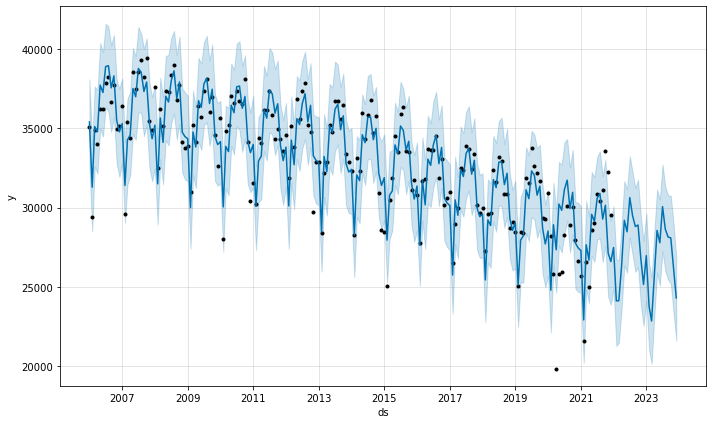

In [16]:
plot = model.plot(forecast)